In [82]:
#Importamos librerias base
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Importamos el modelo de clasificación y las métricas
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

#Para la visualización
import graphviz 
import pydotplus
from IPython.display import Image

In [111]:
#Levantamos el df_final_alternativo_2
df_final_alternativo_2 = pd.read_csv('df_final_alternativo_2.csv')

#Generamos el X y el target
Xa = df_final_alternativo_2.drop(['ClasificacionNum2', 'ID', 'fid', 'Numero', 'lee_y _esc', 'NoLee_ni_e', 'totalpobl','Primario','Inicial (j','Secundario','EGB', 'Universita','Post unive', 'Superior n','Polimodal'], axis = 1)
ya = df_final_alternativo_2['ClasificacionNum2']

#Divimos en train y en test
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa,ya, stratify=ya, test_size= 0.25)

#Estandarizamos con MinMax
scaler = MinMaxScaler()

Xa_train_std = scaler.fit_transform(Xa_train)
Xa_test_std = scaler.fit_transform(Xa_test)

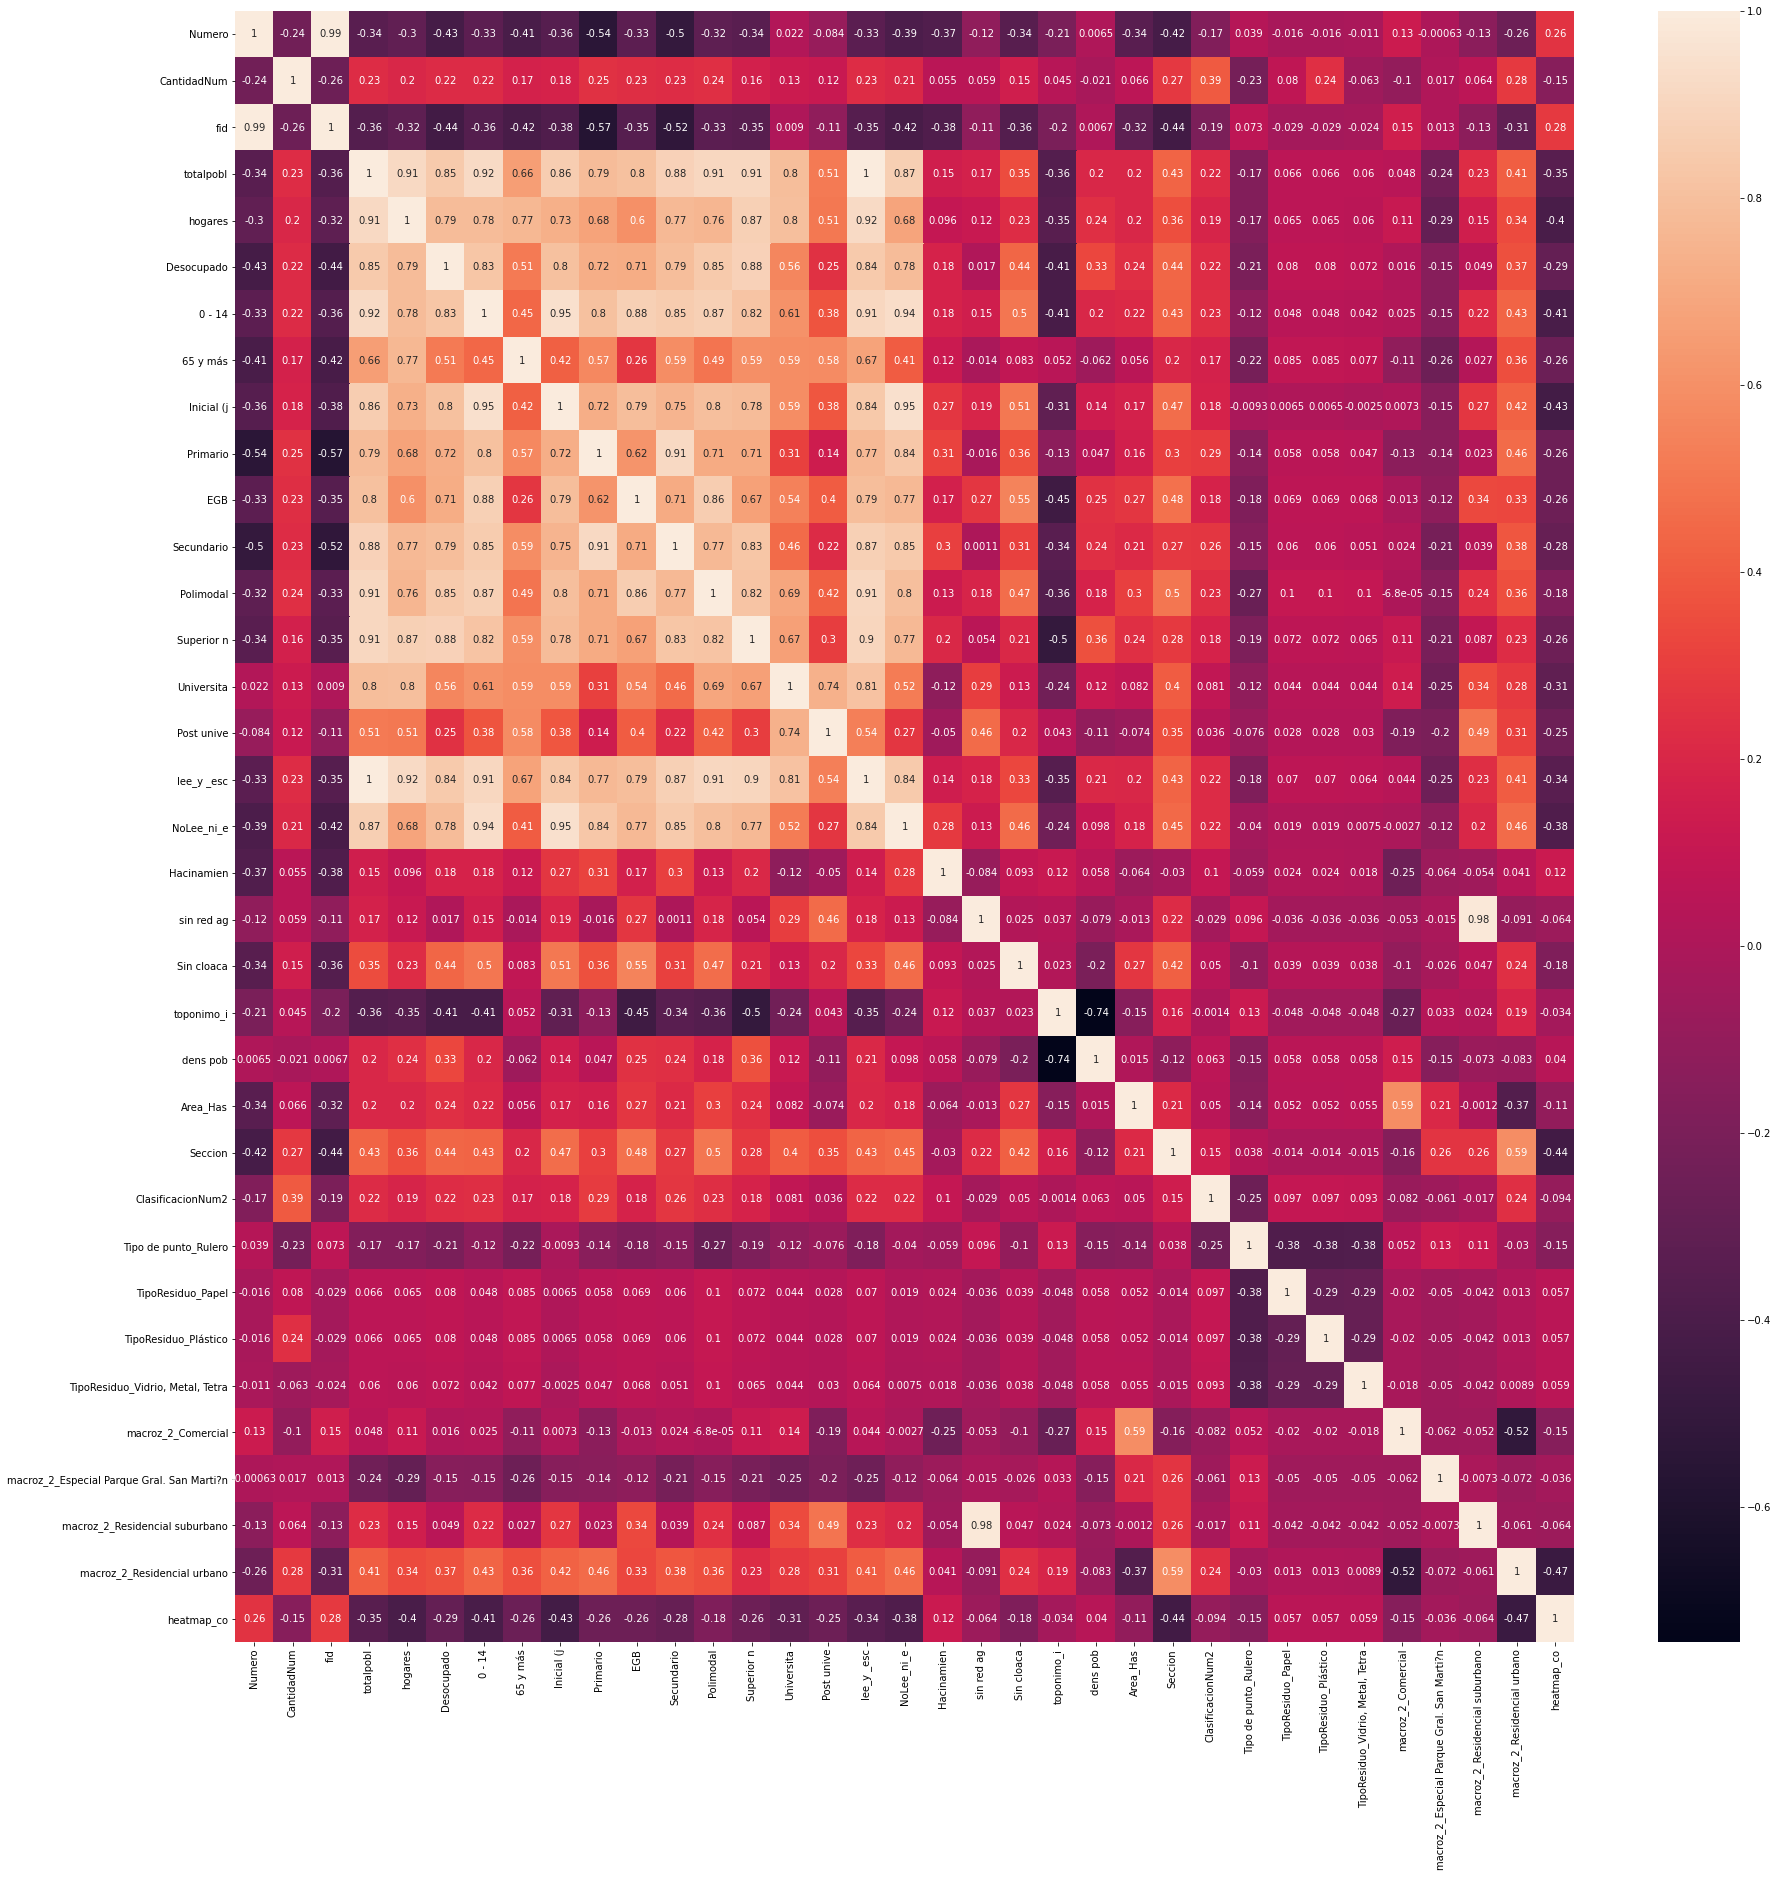

In [89]:
corr = df_final_alternativo_2.corr(method='pearson')

plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
#Porcentaje de etiquetas en el train
ya_train.value_counts() / ya_train.shape[0]

In [ ]:
# Porcentaje de etiquetas en el test 
ya_test.value_counts() / ya_test.shape[0]

Quizás podemos utilizar las herramientas de undersampling / oversampling para homogeneizar las etiquetas

In [112]:
#Inicializamos el modelo
clftree = tree.DecisionTreeClassifier()

In [113]:
#Hagamos un GridSearch con esta grilla
params_grid = { "criterion" : ["gini", "entropy"],
                "min_samples_leaf": [5,10,15,20,None], 
                "max_depth" : [1,2,3,4,5,6,8,9,10,11,12,13,14,None],
                "min_samples_split": [2, 3, 4,None]}

In [114]:
grid_search = GridSearchCV(clftree, params_grid,
                           n_jobs=-1, scoring='accuracy', cv= 10)

In [115]:
#Ajustamos los datos con el modelo
grid_search.fit(Xa_train_std, ya_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13,
                                       14, None],
                         'min_samples_leaf': [5, 10, 15, 20, None],
                         'min_samples_split': [2, 3, 4, None]},
             scoring='accuracy')

In [116]:
#Score durante el entrenamiento.
print(grid_search.best_score_)

#Mejores parametros
print(grid_search.best_params_)

0.7682971972501322
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [117]:
cv_clf = grid_search.best_estimator_

In [118]:
pd.DataFrame({'atributo':Xa.columns, 'importancia':cv_clf.feature_importances_}).sort_values('importancia', ascending = False)

,atributo,importancia
0,CantidadNum,0.590395
3,0 - 14,0.080550
15,"TipoResiduo_Vidrio, Metal, Tetra",0.074567
20,heatmap_co,0.056451
12,Tipo de punto_Rulero,0.044760
11,Seccion,0.044419
8,toponimo_i,0.042434
9,dens pob,0.033677
5,Hacinamien,0.032748
2,Desocupado,0.000000


In [119]:
#Score para el test
accuracy_score(ya_test, cv_clf.predict(Xa_test_std))

0.7365853658536585

In [120]:
#Matriz de confusion
confusion_matrix(ya_test, cv_clf.predict(Xa_test_std))

array([[118,  26],
       [ 28,  33]], dtype=int64)

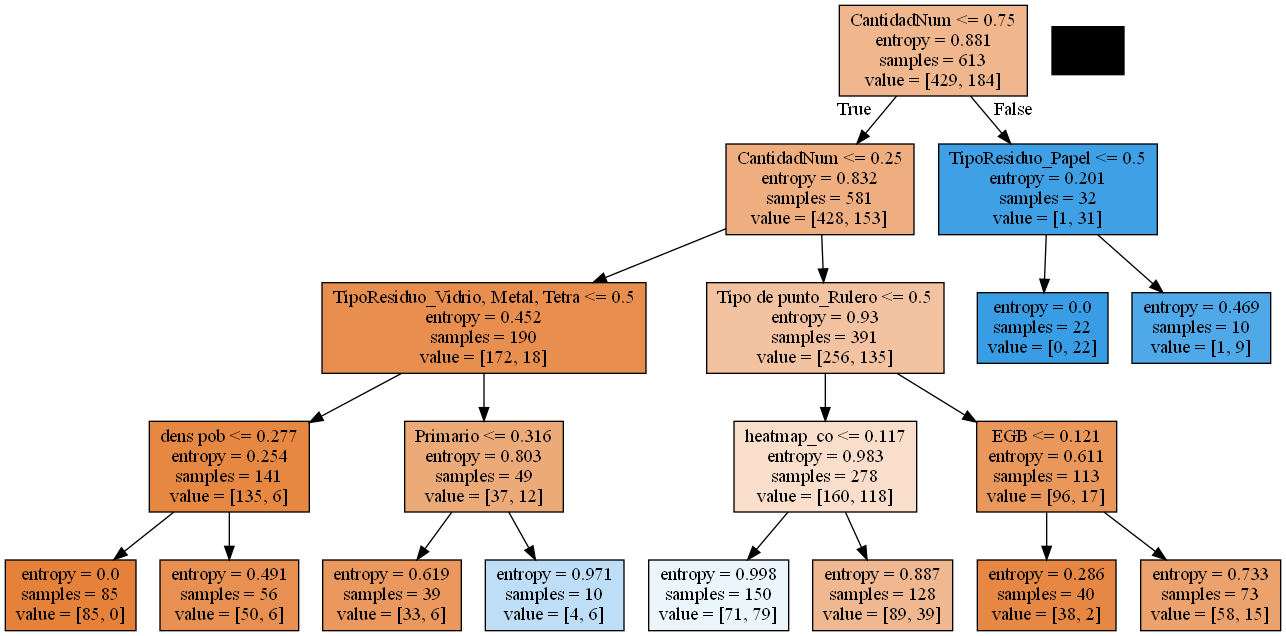

In [99]:
#Visualizamos el árbol
dot_data = tree.export_graphviz(cv_clf, out_file=None,feature_names= Xa_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())